Distance        -0.343696
Body Battery    -0.203832
Sleep           -0.504966
stress           0.192567
Total Ascent     0.146857
Total Descent    0.149212
Temperature     -0.459266
Avg Pace         1.000000
Calories        -0.245905
Name: Avg Pace, dtype: float64


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


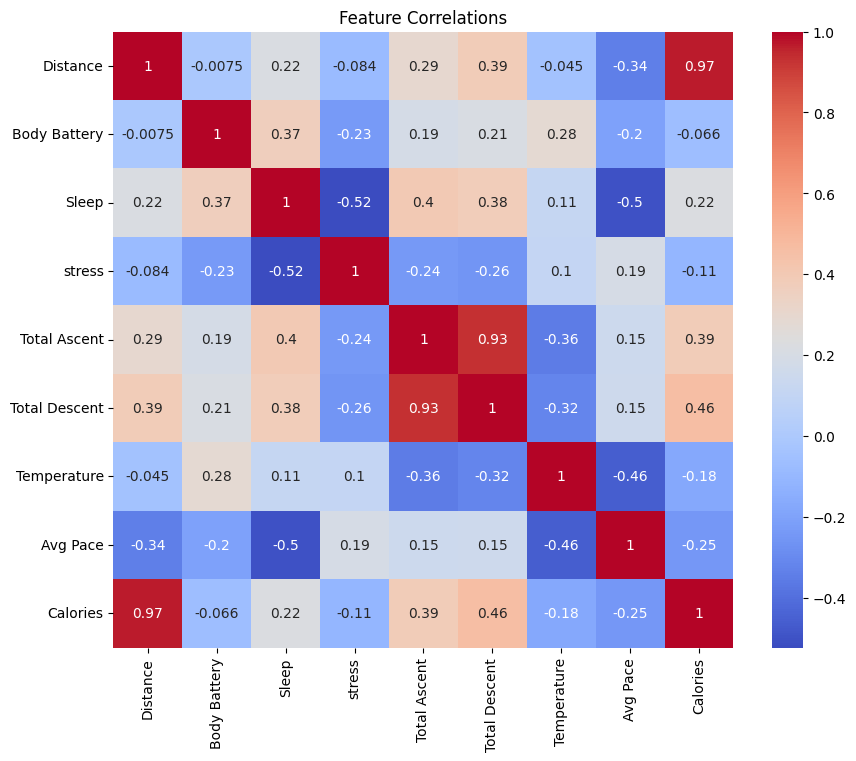

Distance        -0.277679
Body Battery    -0.141563
Sleep           -0.409684
stress           0.095437
Total Ascent     0.242224
Total Descent    0.242083
Temperature     -0.433963
Avg Pace         1.000000
Calories        -0.176856
Name: Avg Pace, dtype: float64


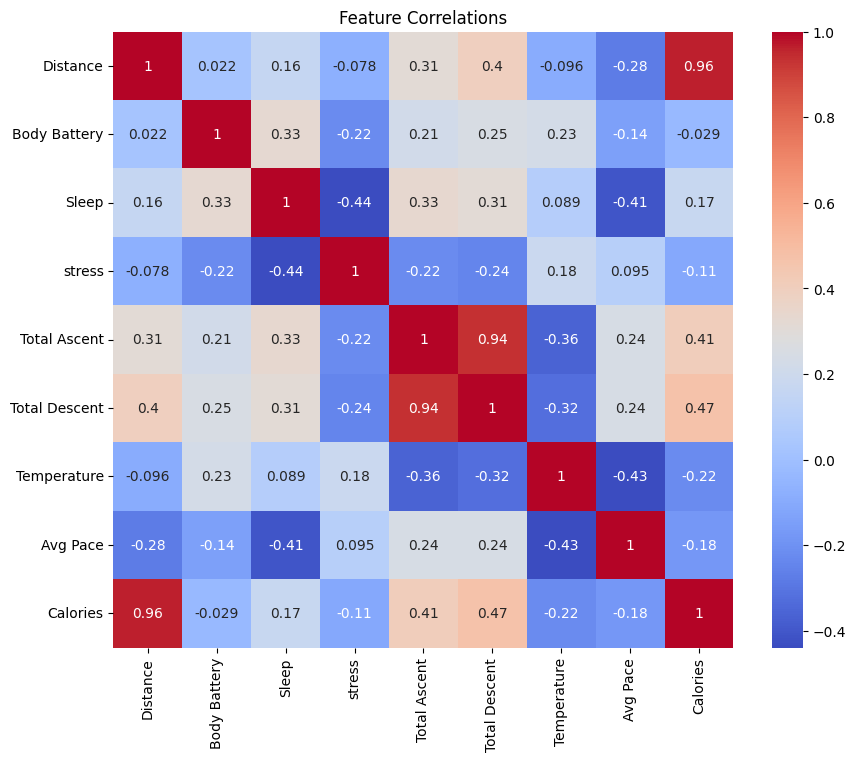

(458, 7) (81, 7) (458, 2) (81, 2)
Epoch 1: Train Loss = 1.1482, Val Loss = 0.8600
Epoch 2: Train Loss = 1.1423, Val Loss = 0.8556
Epoch 3: Train Loss = 1.1364, Val Loss = 0.8512
Epoch 4: Train Loss = 1.1304, Val Loss = 0.8468
Epoch 5: Train Loss = 1.1244, Val Loss = 0.8423
Epoch 6: Train Loss = 1.1184, Val Loss = 0.8378
Epoch 7: Train Loss = 1.1124, Val Loss = 0.8332
Epoch 8: Train Loss = 1.1063, Val Loss = 0.8285
Epoch 9: Train Loss = 1.1002, Val Loss = 0.8237
Epoch 10: Train Loss = 1.0940, Val Loss = 0.8188
Epoch 11: Train Loss = 1.0875, Val Loss = 0.8138
Epoch 12: Train Loss = 1.0811, Val Loss = 0.8087
Epoch 13: Train Loss = 1.0744, Val Loss = 0.8036
Epoch 14: Train Loss = 1.0676, Val Loss = 0.7984
Epoch 15: Train Loss = 1.0608, Val Loss = 0.7931
Epoch 16: Train Loss = 1.0538, Val Loss = 0.7878
Epoch 17: Train Loss = 1.0467, Val Loss = 0.7823
Epoch 18: Train Loss = 1.0394, Val Loss = 0.7768
Epoch 19: Train Loss = 1.0320, Val Loss = 0.7713
Epoch 20: Train Loss = 1.0246, Val Loss = 0.

In [1]:
from preprocessing import preprocess
from train import train_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_train, X_test, y_train, y_test = preprocess(df)
model, train_losses, val_losses, test_mse = train_model(
    X_train, X_test, y_train, y_test
)

print("MSE:", test_mse)

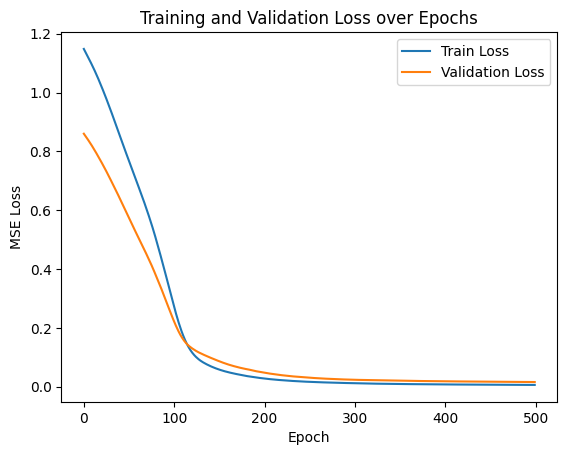

In [2]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss over Epochs")
plt.show()

In [8]:
torch.save(model.state_dict(), "model.pt")

In [5]:
# Prepare new input
X_new = np.array([[5, 30, 470, 30, 100, 100, 30]])
scaler_X = joblib.load("scaler_X.save")
scaler_y = joblib.load("scaler_y.save")

X_new_scaled = scaler_X.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy()
    y_new = scaler_y.inverse_transform(y_pred)

print("Predicted:", y_new)

Predicted: [[409.68564 458.51218]]


In [11]:
from map import geocode_address
from geopy.geocoders import Nominatim

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [12]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [13]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat, 6, 1)
m

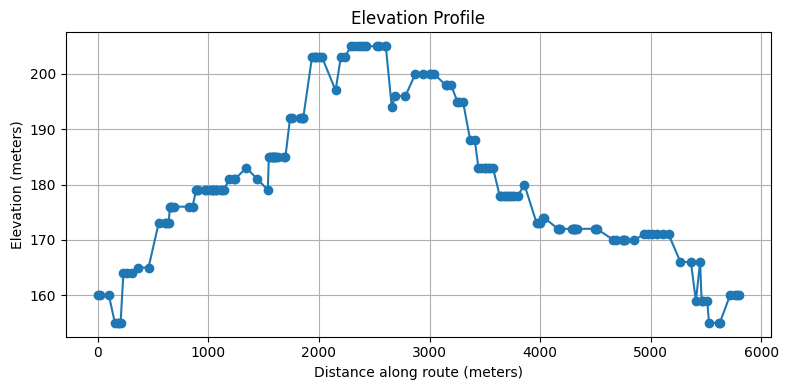

In [11]:
from map import elevation
import matplotlib.pyplot as plt

elevations, distances = elevation(coordinates)
# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances, elevations, marker="o")
plt.xlabel("Distance along route (meters)")
plt.ylabel("Elevation (meters)")
plt.title("Elevation Profile")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 82.0
Total descent: 82.0
